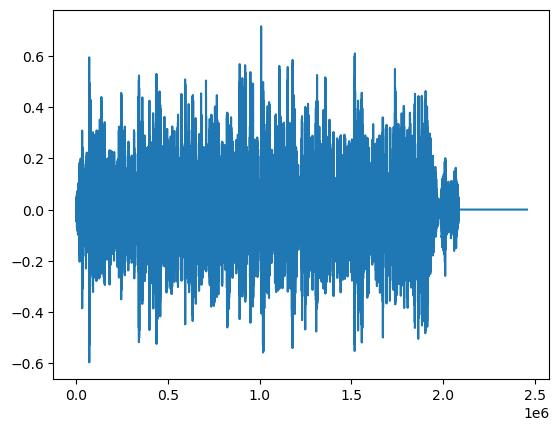

In [37]:
import soundfile as sf
from matplotlib import pyplot as plt

sig, fs = sf.read('lumen_is_listening.wav')
nyq = fs/2
plt.plot(sig)
plt.show()


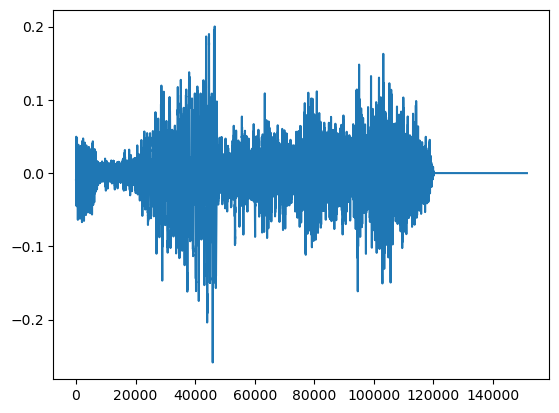

In [38]:
from IPython.display import Audio
clipped = sig[(sr * 44 + 25_000):sr*48]
plt.plot(clipped)
plt.show()
Audio(data=clipped, rate=fs)

/tmp/ipykernel_906843/1501986548.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, nyq)


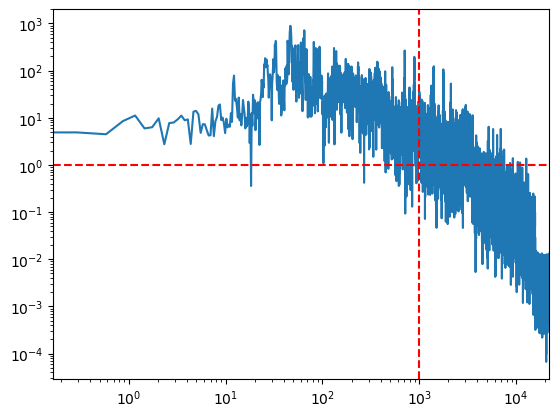

In [39]:
import numpy as np
n = int(len(clipped))
freq = np.abs(np.fft.fft(clipped))
bins = np.fft.fftfreq(n, 1/fs)
plt.loglog(bins[:n//2], freq[:n//2])
plt.axhline(y=1, color='r', linestyle='--')
plt.axvline(x=1e3, color='r', linestyle='--')
plt.xlim(0, nyq)
plt.show()

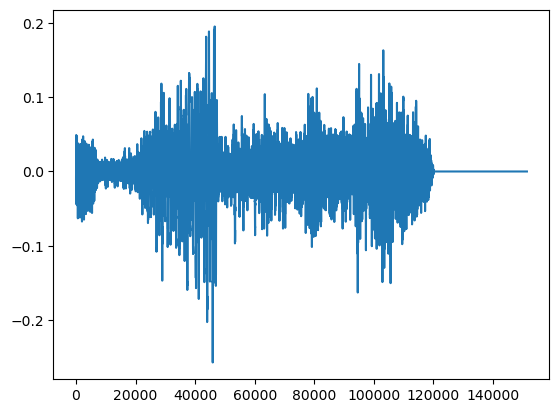

In [61]:
# Add a lowpass filter
from scipy.signal import butter, filtfilt

cutoff = 2e3 # 10KHz
order = 4  # Filter order - adjust for steeper/gentler cutoff
normalized_cutoff = cutoff / nyq  # Normalize the cutoff frequency
b, a = butter(order, normalized_cutoff, btype='low')

# Apply the filter
filtered = filtfilt(b, a, clipped)
plt.plot(filtered)
plt.show()
Audio(data=filtered, rate=fs)